In [88]:
import numpy as np
from sklearn import covariance
from matplotlib import pyplot as plt

In [277]:
n_size = 2
n_samples = 1000
max_std = [20,40]

inv = lambda x: np.linalg.inv(x)

randm = lambda :2*np.random.random((n_size,n_size))-1
randv = lambda : 2*(np.random.random(n_size))-1

get_samples = lambda std: np.random.normal(0,std)

mu_std,nu_std = [np.random.random(n_size)*mstd for mstd in max_std]

#State transition and output transistion matrices
 
Pa, H = [vmax*randm() for vmax in [2,5]]

A = np.diag(randv())


A = inv(Pa).dot(A).dot(Pa)
mu,nu = [[get_samples(std) for _ in range(n_samples)] for std in [mu_std,nu_std]]

x0 = randv()
X= [x0]
Y = []
for m,n in zip(mu,nu):
    X.append(A.dot(X[-1])+m)
    Y.append(H.dot(X[-1])+n)
    

X.pop(0)

np.shape(Y),np.shape(A)

((1000, 2), (2, 2))

In [278]:
Q = covariance.empirical_covariance(mu)
V = covariance.empirical_covariance(nu)

In [279]:
P = 100*np.eye(n_size,n_size)
x_estimate = [randv()]



for y in Y: 
    x = x_estimate[-1]
    x_ap = A.dot(x) #x_aprioir
    P_ap = A.dot(P).dot(A)+Q #P_aprior
    S = H.dot(P_ap).dot(H.transpose())+V
    K = P_ap.dot(H.transpose()).dot(inv(S))
    x_estimate.append(x_ap+K.dot(y-H.dot(x_ap)))

x_estimate.pop(0)

print(len(x_estimate),len(Y))

xhat = np.array(x_estimate)
xe = np.array(X)

1000 1000


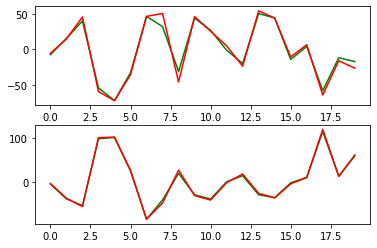

In [283]:
step = 50
plt.subplot(211)
plt.plot(xhat[::step,0],'-g')
plt.plot(xe[::step,0],'r')
plt.subplot(212)
plt.plot(xhat[::step,1],'-g')
plt.plot(xe[::step,1],'r')


In [221]:

mu,nu = [[get_samples(std) for _ in range(n_samples)] for std in [mu_std,nu_std]]

x0 = np.random.random(n_size)*.7
X= [x0]
Y = []
Pa, H = [vmax*randm() for vmax in [2,5]]

A = np.diag(randv())
A = inv(Pa).dot(A).dot(Pa)

for m,n in zip(mu,nu):
    X.append(A.dot(X[-1])+m)
    Y.append(H.dot(X[-1])+n)
    
xe = np.array(X)

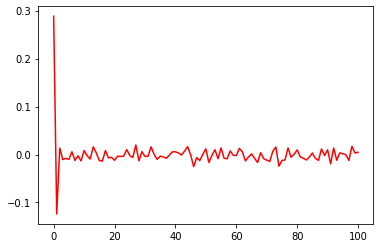

array([[-0.35011214, -0.03609003],
       [ 0.73846592,  0.83827109]])

In [222]:
plt.plot(xe[:,0],'r')
plt.show()
e,_ = np.linalg.eig(A)
A

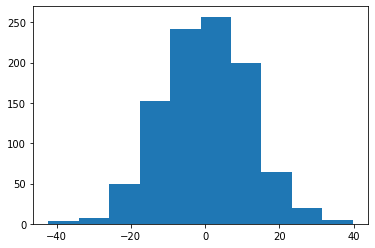

In [295]:
mu = np.array(mu)
_=plt.hist(mu[:,0])

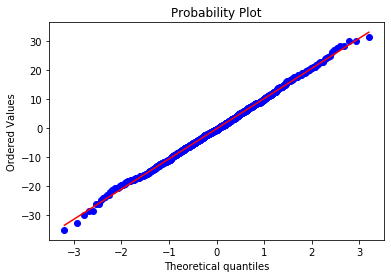

In [311]:
import pylab 
import scipy.stats as stats
import statsmodels.api as sm

stats.probplot(mu[:,1], dist="norm", plot=pylab)
# sm.qqplot(mu[:,0],line='s')
pylab.show()